In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy import stats
import ipywidgets as widgets
from collections import OrderedDict
import matplotlib.gridspec as gridspec

In [3]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

## Data


In [4]:
def data(Nd, x_max, slope, noise_factor):
    xd = np.random.random(Nd)*x_max
    yd = slope*xd + np.random.random(Nd)*xd*noise_factor - xd*noise_factor/2.
    return xd, yd

## Model


In [5]:
def model(w, x):
    w = np.atleast_1d(w)
    x = np.atleast_1d(x)
    y = w[:,None]*x[None,:]
    return np.squeeze(y)

## Likelihood
Lets model the likelihood of each datapoint as a normal distribution with mean equal to the data value, and standard deviation equal to some percentage of the mean value.

In [6]:
def log_likelihood(w, error, xd, yd):
    mean = yd
    stddev = error * mean
    ymd = model(w, xd)
    lld = np.log(1./np.sqrt(2.*np.pi*stddev[None,:]**2)) + \
        -1.*((ymd-mean[None,:])**2)/(2.*stddev[None,:]**2)
    return np.sum(lld, axis=1)

## Prior

In [7]:
def prior(w, mean, stddev):
    return stats.norm(loc=mean, scale=stddev).pdf(w)

## Posterior 
We will evaluate the posterior at several possible values of the parameter.

In [8]:
prior_stddev = 0.15
data_stddev_perc = 0.5

In [9]:
w_min = 0.
w_max = 6.
Nw = 1001
prior_mean = 4
Nd_list = [5, 10, 100, 1000, 10000]
y_max = 30.
x_max = 10.
slope = 3.
noise_factor = 2.

In [10]:
W = np.linspace(w_min, w_max, Nw)
def bayes(Nd):
    xd, yd = data(Nd, x_max, slope, noise_factor)
    dw = W[1]-W[0]
    log_llhd = log_likelihood(W, data_stddev_perc, xd, yd)
    log_prior = np.array([np.log(prior(w, prior_mean, prior_stddev)) for w in W])
    log_post = log_llhd + log_prior
    p_max = np.max(log_post)
    mld = np.sum( np.exp(log_post-p_max)*dw)
    post_i = np.exp(log_post-p_max)/mld
    prior_i = np.exp(log_prior)
    l_max = np.max(log_llhd)
    mld = np.sum( np.exp(log_llhd-l_max)*dw)
    llhd_i = np.exp(log_llhd-l_max)/mld
    return llhd_i, prior_i, post_i, xd, yd

In [11]:
bayes_list = [bayes(Nd) for Nd in Nd_list]

<IPython.core.display.Javascript object>


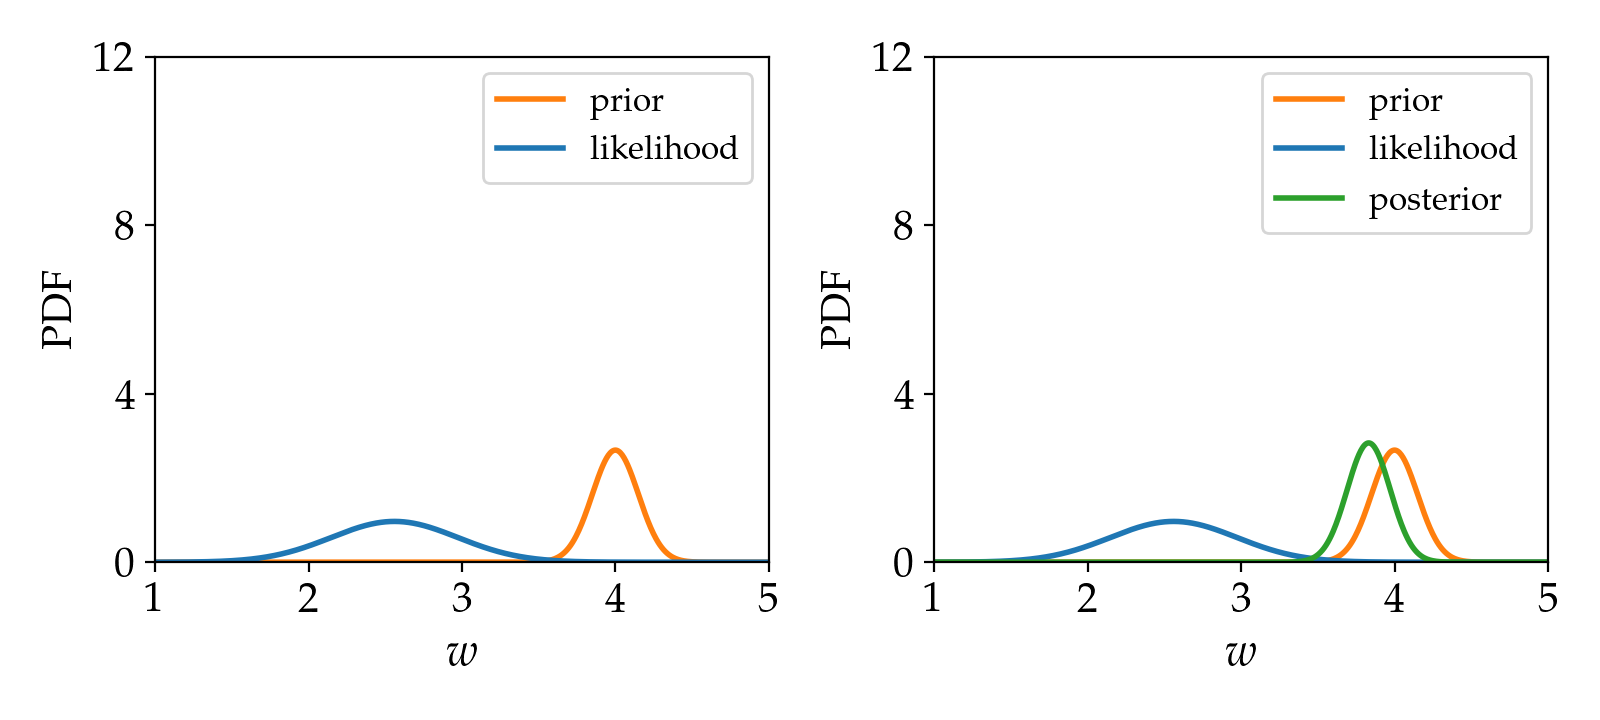

In [50]:
index = 1 # select index of 1 (N=10) or 3 (N=1000) 
llhd_i, prior_i, post_i, xd, yd = bayes_list[index] 
fig = plt.figure(figsize=(8,3.6))
# ax1 = fig.add_subplot(gs[0, :], )
# xm = np.array([0, x_max])
# ym = model(slope, xm)
# line0, = ax1.plot(xd, yd,'C0o')
# ax1.plot(xm, ym,'k--')
# plt.xlabel('x')
# plt.ylabel('y')
# ax1.set_xlim(left=0)
# ax1.set_ylim(bottom=0)
ax2 = fig.add_subplot(1, 2, 1)
line2, = ax2.plot(W, prior_i, 'C1-', label='prior', linewidth=2)
line1, = ax2.plot(W, llhd_i, 'C0-', label='likelihood', linewidth=2)
ax2.set_xlabel(r'$w$',fontsize=16)
ax2.set_ylabel('PDF',fontsize=15)
ax2.set_xlim([w_min+1, w_max-1])
ax2.set_ylim([0, 0.4*y_max])
ax2.legend(loc='upper right',fontsize=12)
ax3 = fig.add_subplot(1, 2, 2)
line4, = ax3.plot(W, prior_i, 'C1-', label='prior', linewidth=2)
line3, = ax3.plot(W, llhd_i, 'C0-', label='likelihood', linewidth=2)
line5, = ax3.plot(W, post_i, 'C2-', label='posterior', linewidth=2)
ax3.set_xlim([w_min+1, w_max-1])
ax3.set_ylim([0, 0.4*y_max])
ax3.legend(loc='upper right',fontsize=12)
ax3.set_xlabel(r'$w$',fontsize=16)
ax3.set_ylabel('PDF',fontsize=15)

ax2.set_yticks([0,4,8,12])
ax3.set_yticks([0,4,8,12])
ax2.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)
ax3.tick_params(axis='x', labelsize=15)
ax3.tick_params(axis='y', labelsize=15)

fig.tight_layout(pad=1.5)
plt.savefig('../figs-new/amount_data_{}.pdf'.format(Nd_list[index]),bbox_inches='tight')
plt.show()

# # Widget
# def update(Ndi = 0):
#     llhd_i, prior_i, post_i, xd, yd = bayes_list[Ndi]
#     line0.set_data(xd,yd)
#     line1.set_ydata(llhd_i)
#     line2.set_ydata(prior_i)
#     line3.set_ydata(llhd_i)
#     line4.set_ydata(prior_i)
#     line5.set_ydata(post_i)
#     fig.canvas.draw()
# widgets.interact(update, Ndi=OrderedDict([(5,0), (10,1), (100,2), (1000,3), (10000,4)]));